# Read Data

In [1]:
import pandas as pd
import numpy as np
from nltk import agreement
from scipy import stats
import matplotlib.colors as mcolors
from matplotlib import pyplot as plt

In [2]:
emotions = ["joy", "sadness", "trust", "disgust", "fear", "anger", "surprise", "anticipation"]
anotator = ["Felix", "Charlotta", "Max"]

In [3]:
df = pd.read_csv("EA_assignm1_annotation-environment_combined - Tabellenblatt1.csv")

In [4]:
df = df.drop(columns=['ID', 'comment', 'Unnamed: 26', 'Unnamed: 27'])
# df["ID"] = df["ID"].astype(int)
df = df.rename(columns={"joy": "joy-Felix", "Unnamed: 2": "joy-Charlotta", "Unnamed: 3": "joy-Max"})
df = df.rename(columns={"sadness": "sadness-Felix", "Unnamed: 5": "sadness-Charlotta", "Unnamed: 6": "sadness-Max"})
df = df.rename(columns={"trust": "trust-Felix", "Unnamed: 8": "trust-Charlotta", "Unnamed: 9": "trust-Max"})
df = df.rename(columns={"disgust": "disgust-Felix", "Unnamed: 11": "disgust-Charlotta", "Unnamed: 12": "disgust-Max"})
df = df.rename(columns={"fear": "fear-Felix", "Unnamed: 14": "fear-Charlotta", "Unnamed: 15": "fear-Max"})
df = df.rename(columns={"anger": "anger-Felix", "Unnamed: 17": "anger-Charlotta", "Unnamed: 18": "anger-Max"})
df = df.rename(columns={"surprise": "surprise-Felix", "Unnamed: 20": "surprise-Charlotta", "Unnamed: 21": "surprise-Max"})
df = df.rename(columns={"anticipation": "anticipation-Felix", "Unnamed: 23": "anticipation-Charlotta", "Unnamed: 24": "anticipation-Max"})
df = df.dropna()

In [5]:
cmap = mcolors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

# Emotion-Agreement

## Kappa

In [6]:
def equal_distance(label1, label2):
    label1, label2 = int(label1), int(label2)
    return 0.0 if label1 == label2 else 1.0

def on_off_split(label1, label2):
    label1, label2 = int(label1), int(label2)
    if label1 > 0:
        label1 = 1
    else:
        label1 = 0
    if label2 > 0:
        label2 = 1
    else:
        label2 = 0
    return 0.0 if label1 == label2 else 1.0

def half_split(label1, label2):
    label1, label2 = int(label1), int(label2)
    if label1 > 1:
        label1 = 1
    else:
        label1 = 0
    if label2 > 1:
        label2 = 1
    else:
        label2 = 0
    return 0.0 if label1 == label2 else 1.0

Amount 94


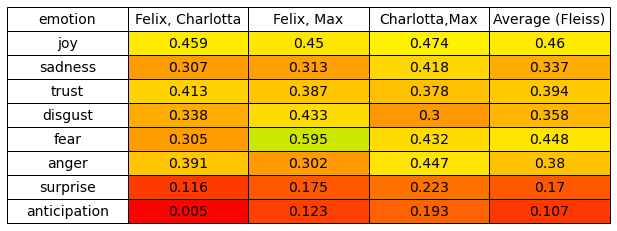

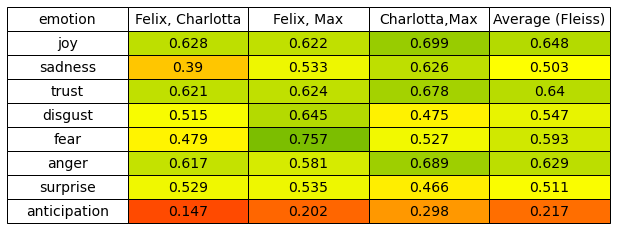

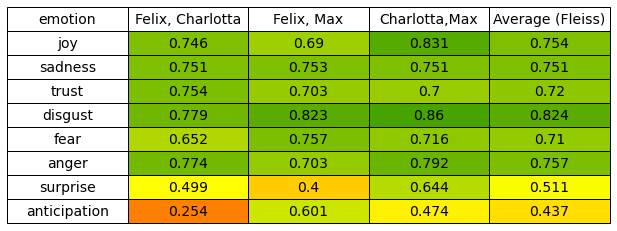

In [10]:
amount = len(df)
print("Amount", amount)

for distance in [equal_distance, on_off_split, half_split]:
    result = pd.DataFrame()
    for emotion in emotions:
        formatted_codes = [[1,i,df[emotion +"-Felix"].iloc[i]] for i in range(amount)] + [[2,i,df[emotion +"-Charlotta"].iloc[i]] for i in range(amount)]  + [[3,i,df[emotion +"-Max"].iloc[i]] for i in range(amount)]
        # data-input: (coder,item,label)
        ratingtask = agreement.AnnotationTask(data=formatted_codes, distance=distance)

        #print('Fleiss\'s Kappa:', emotion, ratingtask.multi_kappa())
        #print('Cohens\'s Kappa (Felix,Charlotta):', emotion, ratingtask.kappa_pairwise(1,2))
        #print('Cohens\'s Kappa (Felix,Max):', emotion, ratingtask.kappa_pairwise(1,3))
        #print('Cohens\'s Kappa (Charlotta,Max):', emotion, ratingtask.kappa_pairwise(2,3))
        #print('Krippendorff\'s Alpha:', emotion, ratingtask.alpha())
        new_row = {'emotion':emotion, 'Felix, Charlotta':ratingtask.kappa_pairwise(1,2), 'Felix, Max':ratingtask.kappa_pairwise(1,3), 'Charlotta,Max':ratingtask.kappa_pairwise(2,3), 'Average (Fleiss)':ratingtask.multi_kappa()}
        result = result.append(new_row, ignore_index=True)

    # calulcate colors
    color_values = cmap(result[['Felix, Charlotta', 'Felix, Max', 'Charlotta,Max', 'Average (Fleiss)']] )
    colors = np.ones((8, 4+1,4))
    colors[:,1:, :] = color_values

    # round values
    result[['Felix, Charlotta', 'Felix, Max', 'Charlotta,Max', 'Average (Fleiss)']] = result[['Felix, Charlotta', 'Felix, Max', 'Charlotta,Max', 'Average (Fleiss)']].round(3)

    # order columns
    result = result[['emotion', 'Felix, Charlotta', 'Felix, Max', 'Charlotta,Max', 'Average (Fleiss)']]

    fig = plt.figure()
    ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])

    table=plt.table(cellText=result.values, colLabels=result.columns,
                    loc='center', cellLoc='center', colWidths = [0.18]*result.values.shape[1],
                    cellColours=colors)
    table.scale(2, 2)
    table.auto_set_font_size(False)
    table.set_fontsize(14)

    plt.savefig("emotion-eval-" + distance.__name__ + ".png", bbox_inches="tight")
    plt.show()

## Spearman

In [ ]:
for emotion in emotions:
    print('Spearman correlation (Felix,Charlotta):', emotion, stats.spearmanr(df[emotion +"-Felix"], df[emotion +"-Charlotta"]))
    print('Spearman correlation (Felix,Max):',emotion, stats.spearmanr(df[emotion +"-Felix"], df[emotion +"-Max"]))
    print('Spearman correlation (Charlotta,Max):', emotion, stats.spearmanr(df[emotion +"-Charlotta"], df[emotion +"-Max"]))